### Added 3.3) to export mitochondria intermediates for SKALA LAB
<h1 style="text-align:center;">Cell Catcher <span style="text-align:center;font-size: 0.5em;">0.4.4</span></h1>
<h2 style="text-align:center;">Mito Hacker Toolkit <i style="font-size: 0.5em;">0.7.1</i></h2>
<h3 style="text-align:center;">Kashatus Lab @ UVA</h3>

# Welcome to Cell Catcher
#### Cell Catcher is part of Mito Hacker toolkit that enables you to separate individual cells from fluorescently labeled multi-cell images.
This Jupyter notebook provides you with step-by-step directions to separate individual cells from multi-cell images.

## 1) Importing necessary libraries
Please check the requirements in the Readme file.

##### Just run the following block of code, you are not expected to enter any data here.

In [11]:
#Base Libraries
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib.gridspec import GridSpec
import cv2
import shutil
from pprint import pprint
from pathlib import Path
import tifffile


#Interaction
import ipywidgets as widgets
from IPython.display import display
from ipywidgets import interact, interactive, fixed, interact_manual, IntSlider, Checkbox, FloatSlider, Dropdown
from IPython.display import clear_output

#Core Functions
import cemia55s as cemia

style = {'description_width': 'initial'}
layout = widgets.Layout(width='95%')

## 2) Locate and Sample Files

<br>
<details>
<summary><span style="font-size:16px;font-weight: bold; color:red">What should I do next? (click here to expand)</span></summary>
    
#### <span style="color:red;">You should interact with the next cell: </span> Please run the next cell, a box will appear. Enter the relative/absolute address of the folder that contains your images inside the box, then press the enter key. 

#### <span style="color:red;">Examples: </span>
* Relative Address
    * Use . if the images are in the same folder as this file
    * If your folder of the images (my_folder_of_images) is located in the same directory as this file, you should enter: my_folder_of_images
* Absolute Address
    *If your images are located on Desktop
        * Mac: you should enter: /Users/username/Desktop/my_folder_of_images
        * Windows: you should enter: C:\Users\username\Desktop\my_folder_of_images
#### <span style="color:red;">Note: </span>
* It is preferred to have the folder of your images in the same folder as the current file that you are running
* You should press enter after you enetered the address in the box.
</details>

In [12]:
address,file_list = cemia.address(extension=".tiff")

Where are the files located?

C:\Users\Nabiki\Desktop\tq_dataset_aag_masks_1_to_10-rgb\images\transformed

All set! You may run the next cell.


### How many files to sample?

<br>
<details>
<summary><span style="font-size:16px;font-weight: bold; color:red">What should I do next? (click here to expand)</span></summary>

#### <span style="color:red;">You should interact with the next cell: </span> Please run the next cell, a box will appear. Enter the number of the files you want to sample inside the box, then press the enter key. 

#### You should enter the maximum number of the sample files that you want to use in the rest of the app. The purpose of these sample images is to help you to tune your parameters.
##### Just sample a reasonable number of files.

#### <span style="color:red;">Note:</span>
* The number of sampled images would be equal or lower than the number your enter here. The maximum indicated number is the total number of the files in that folder, which may or may not be valid images.
* Press the enter key after you entered the desired number of files, and proceed to the next cell.

#### <span style="color:red;">Interaction required</span>
</details>

In [13]:
how_many = cemia.how_many(file_list)


How many files to sample? (If possible)
Please enter a valid integer value below 10
3


##### Next cell randomly samples some images for parameter tuning purposes.
##### Just run the following block of code, you are not expected to enter any data here.

In [14]:
random_files = cemia.random_files(address,file_list,how_many)


These files were validated and selected:


['2020_10_21_HeLa_TMRE_fov_0016-image_transformed.tiff',
 '2020_10_21_HeLa_TMRE_fov_0005-image_transformed.tiff',
 '2020_10_21_HeLa_TMRE_fov_0013-image_transformed.tiff']


## 3) Finding and isolating individual cells in the sample images
##### Just run the following block of code, you are not expected to enter any data here.

In [15]:
threshold_pro = ['Assisted Automatic (Pro)']
abspath = os.path.join(address,'temp')

### 3.1) Identifying Nuclei

##### The next block of code is designed to identify individual nuclei in the image. While in most cases the default values will perform well, you may find it useful to tune the values of different parameters, and find a combination that works best for your dataset.

<br>
<details>
<summary><span style="font-size:16px;font-weight: bold; color:red">List of parameters that you will adjust in the next cell (click here to expand)</span></summary>

#### Nuclei Signal Threshold
* By changing the value of this parameter, you change the signal threshold for detecting nuclei in the image. Lower threshold may help you to detect dimmer nuclei in the image. However, in some cases extemely low threshold values may cause problems by capturing the background noise as nuclei. 
* Select a threshold value that reasonably works for your sample images. You may check sample images by selecting them from the dropdown menu.

#### Nuclei Non Uniformity
* This option helps you to reach a better nuclei segmentation results over a wider range of images.

#### Nuclei Size Threshold
* This option helps you to decide on the minimum acceptable nucleus size in your images.

#### Correct Nuclei Shape
* This feature tries to reconstruct the shape of the poorly illuminated nuclei in the image.
* In some cases, this correction may result in nuclei with angular shapes.</p>
    * This phenomenon usually does not have an adverse effect on your analysis, since these binary nuclei are merely used as masks on the real nuclei in the image, and their goal is maximal capturing of the nuclei in the image. Ultimately the original shape of the nuclei (from the original image) would be present in the image.

#### Low Nuclei Signal
* In cases where the signal level in the nuclei channel of your images is low, or your images suffer from low contrast, this option may help you to capture more nuclei in the image.
#### <span style="color:red;">Note:</span>
<p>Make sure your selected settings work well on all your sample images by selecting different images from the dropdown menu. If they work nicely on sample images, they will do the same on all your images.</p>

### <span style="color:red;">Important Note:</span>
<p>If you have used Nuc Adder to simulate missing nuclei, we suggest to select "Low Nuclei Signal" optiom and use higher values for "Nuclei Non Uniformity"(100+).</p>


### How to reset to the default values?
* Just run the cell again.
</details>

In [16]:
nuc_mask = []

#List of Parameters
params = cemia.catcher_initial_params

@interact(file=Dropdown(options=random_files, description='Select a File',style=style, layout=layout),
          Intensity_Threshold=IntSlider(min=0,max=100,step=1,value=10,continuous_update=False, description='Nuclei Signal Threshold', style=style,layout=layout),
          NonUniformity=IntSlider(min=1,max=200,step=2,value=25,continuous_update=False, description='Nuclei Non Uniformity', style=style,layout=layout),
          Size_Threshold=IntSlider(min=100,max=5000,step=100,value=1000,continuous_update=False,description='Nuclei Size Threshold',layout=layout,style=style),
          correct=Checkbox(value=True,description='Correct Nuclei Shape',layout = layout, style=style),
          diffuse=Checkbox(value=False,description='Low Nuclei Signal Level',layout = layout, style=style))

def segment_nucleus(file,Intensity_Threshold,NonUniformity, Size_Threshold, correct, diffuse):

    fullpath_input = os.path.join(address, file)
    abspath = os.path.join(address, 'cell_catcher')
    
    print(fullpath_input)
    print(abspath)
    namestring = file[:file.rfind('.')] + '.tif'
    
    #Update parameters, based on user interaction
    params['Intensity_threshold'].append(Intensity_Threshold)
    params['Size_threshold'].append(Size_Threshold)
    params['diffused_bg'].append(diffuse)
    params['nuc_correction'].append(correct)
    params['non_uniformity'].append(NonUniformity)

    try:        
        mask = cemia.nucleus_filtering(fullpath_input, abspath, Intensity_Threshold, Size_Threshold,True,NonUniformity,correct, diffused=diffuse)
        nuc_mask.append(mask)
    except:
        print('Something is not right! Try another image.')
        pass

print('You can now go to next step!')


interactive(children=(Dropdown(description='Select a File', layout=Layout(width='95%'), options=('2020_10_21_H…

You can now go to next step!


### 3.2) Identifying Mitochondria

##### The next block of code is designed to identify and separate individual cells in the image. While in most cases the default values will perform well, you may may find it useful to tune the values of different parameters, and find a combination that works best for your dataset.

<br>
<details>
<summary><span style="font-size:16px;font-weight: bold; color:red">List of parameters that you will adjust in the next cell (click to expand)</span></summary>

#### Mitochondrial Signal Threshold

* This slider sets the intensity threshold for mitochondria. Lower threshold results in capturing more possible mitochondria in the image. Check additional info about this slider and its effects in the "Global Mitochondrial Mask" part of the 'Important Notes' section.

#### Mitochondrial Search Radius For Ghost Cells

* This slider sets the radial distance around the nuclei to search for mitochondria. This tool is used to identify the ghost cells in the image
    * The ghost cells are the cells where their nucleus is stained but mitochondrial staining is missing.

#### Maximum Mitochondrial Content For Ghost Cells

* This slider sets the minimum acceptable amount of mitochondrial content around a cell (within the radius set above). The cells with mitochondrial content below this threshold will be marked as ghost cells.

#### Remove The Ghost Cells
* By selecting this option, you remove the nuclei of the cells marked as ghost cells from the image.

#### Low Mitochondrial Signal
* You may select this option if the signal level, or the contrast (Signal to Noise Ratio (SNR) in the mitochondrial channel of your images is low.
    * Based on the image condition this option may have additional applications. Please refer to the "Important Notes" section. 

#### My Cells Are Reasonably Separated
* If your cells are sparsely distributed across your images, you can use this option along with "Low Mitochondrial Signal" option to speed up your cell separation up to 10X. Please refer to the "Important Notes" section.

#### Separate Cells
* This box should be checked in order to separate the individual cells in the image.
   * Please refer to the additional notes below to find the best time to check this box.

</details>

<br>
<details>
<summary><span style="font-size:16px;font-weight: bold; color:red">Important Notes (click to expand)</span></summary>


### What does the "Global Mitochondrial Mask" figure tell you?

#### The image titled "Global Mitochondrial Mask" serves an important purpose, and can be extremely useful if used and interpreted properly.

This figure represents the global mitochondrial content mask for the image, and is not intended to reflect the final and detailed mitochondrial mapping or network in your cells (That's Mito Miner's job). The yellow objects on the image reflect all the objects on the image that are assessed as the probable mitochondrial content in the image, and would be assigned to different nuclei. This may also include some background noise, which is okay, since Mito Miner will take care of it.

Lowering the "Mitochondrial Signal Threshold" would result in increase in the number and the area of the yellow objects in the image. This means that you have more mitochondrial candidate objects, which may increase the chance of capturing of true mitochondria in each image.

* This is true as long as the yellow objects across the image do not overlap and/or you are not capturing too much noise as mitochondria (i.e. parts of the image that you are sure that are noise and not real mitochondria)

* More yellow content in the image means more assignment tasks, which in turn may increase the processing time.
  
* Important: check a few images (using the drop down menu above) before you decide on your final threshold value, and make sure the set of parameters reasonably represents the mitochondrial content in all of those images, since the same threshold will be applied to the batch of images you are analyzing together.

* There is an exception which is discussed in the "My Cells Are Entangled" part.

### When to use "Low Mitochondrial Signal"

* The most obvious situation is when you have low signal or low contrast images. Low signal levels, and low Signal to Noise Ratio (SNR), make it harder for Cell Catcher to detect mitochondria in the image and subsequently assign them to different cells. By selecting this option Cell Catcher will perform additional pre-processing on the images in attempt to capture more mitochondria.

* If you select this option in high signal/SNR images, it will result in forming of yellow clusters in the  "Global Mitochondrial Mask" figure, which is totally fine if the following two conditions are met:
    * As a result of selecting this option you are not capturing excessive amounts of noise as mitochondrial candidates in the image (Similar to lowering the "Mitochondrial Signal Threshold").
    * The yellow blobs formed around cells, or in general the yellow objects across the image are not overlapping or excessively touching each other.
    * In both cases this option may increase the processing time since Cell Catcher should assign more content to various cells*.

*There is an exception which is discussed in the "My Cells Are Entangled" part.

### When to use "My Cells Are Entangled"

If your cells have mitochondrial networks that are entangled, and it is very hard to decide on the boundaries of the adjacent cells, you may use this option. However, this option may increase the processing time up to 10X.

* When you have cells with entangled mitochondrial networks, if you select "Low Mitochondrial Signal" and/or you drastically lower the "Mitochondrial Signal Threshold” value, your actions may result in overlap or excessive touching of the mitochondrial networks from adjacent cells that may make the processing and separation of cells harder.

##### Before selecting this option, you should make sure that this approach is appropriate for all the majority of the images in your batch.

### When to check the "Separate cells" box?

* While you are deciding on the best set of parameters for your sample images (which can individually be selected from the dropdown menu at the top), we suggest to keep the "Separate Cells" unchecked. Once you are happy with the combination of your parameters, then select this box to isolate individual cells in your desired images. 

* Every time you select a new cell, while the segment cell is checked, it will automatically start to segment the cells in the image, which may take some time. Once segmentation is done, the segmented cells will show up.

### How to reset to the default values?

* Just run the cell again. In other words, every time you re-run a cell with sliders and checkboxes, the values will reset to their default values.

</details>

In [17]:
@interact(file=Dropdown(options=random_files, description='Select a File',style=style, layout=layout),
          Threshold=IntSlider(min=5,max=100,step=1,value=65,continuous_update=False,description='Mitochondrial Signal Threshold',layout=layout, style=style),
          dilation=IntSlider(min=20,max=100,step=5,value=35,continuous_update=False,description='Mitochondrial Search Radius For Ghost Cells',layout=layout, style=style),
          empty_cell_threshold=IntSlider(min=0,max=250000,step=1000,value=0,continuous_update=False,description='Maximum Mitochondrial Content For Ghost Cells',layout=layout, style=style),
          correct=Checkbox(value=False,description='Remove The Ghost Cells',style=style, layout=layout),
          low_mito=Checkbox(value=False,description='Low Mitochondrial Signal (Read the notes in the previous cell to properly use this option)',style=style, layout=layout),
          entangled=Checkbox(value=False,description='My Cells Are Entangled (Read the notes in the previous cell to properly use this option)',style=style, layout=layout),
          separate=Checkbox(value=False,description='Separate Cells (This May take a while, read the notes in the previous cell before selecting it.)',style=style, layout=layout),
          only_export_mito_mask=Checkbox(value=False,description='Only Export Intermediate Mitochondria Masks.', style=style, layout=layout)
         )

def segment_cell(file,Threshold, dilation,empty_cell_threshold, correct, low_mito,entangled,separate, only_export_mito_mask):

    fullpath_input = os.path.join(address, file)
    abspath = os.path.join(address, 'cell_catcher_temp')
    
    namestring = file[:file.rfind('.')] + '.tif'
    
    #Updating parameters based on user interaction
    params['mito_threshold'].append(Threshold)
    params['empty_cell_thresh'].append(empty_cell_threshold)
    params['mito_low'].append(low_mito)
    params['sparse'].append(entangled)
    params['correct_cells'].append(correct)
    
    #### ECG, new or missing params
    params['only_export_mito_mask'].append(only_export_mito_mask)
    params["separate"] = separate

    try:
        mask_blue=cemia.auto_segmentation(fullpath_input, abspath, namestring,params['mito_threshold'][-1],params["separate"], params["dilation"], params['correct_cells'][-1], params['Intensity_threshold'][-1], params['Size_threshold'][-1],params['empty_cell_thresh'][-1], hide=False,nuc_correct=False,diffused=params['diffused_bg'][-1], mito_diffused=params['mito_low'][-1],entangled=params['sparse'][-1], non_uniformity=params['non_uniformity'][-1], only_export_mito_mask = params["only_export_mito_mask"][-1])
    except Exception as e:
        print(e)
        print(f'{file} is not a valid image file, try another file.')
        pass

interactive(children=(Dropdown(description='Select a File', layout=Layout(width='95%'), options=('2020_10_21_H…

In [18]:
print('The following settings will be used to analyze all the images!')
print('**************************************************************')
params_pd = {}
for k in params:
    try:
        params_pd[k] = params[k][-1]
        print(f'{k}: {params_pd[k]}')
    except:
        pass
    
params_pd = pd.DataFrame(params_pd, index=[0])
params_pd.to_csv(os.path.join(address ,'cell_catcher_params.csv'), index=False)


The following settings will be used to analyze all the images!
**************************************************************
Intensity_threshold: 10
Size_threshold: 1000
correct_cells: False
neighorhood: 45
mito_threshold: 65
empty_cell_thresh: 0
nuc_correction: True
diffused_bg: True
mito_low: False
sparse: False
non_uniformity: 135
only_export_mito_mask: False


## 3.3) EXPORT MITO MASK INTERMEDIATES
ONLY RUN THE FOLLOWING CELL IF YOU'D LIKE TO EXPORT WHOLE IMAGE MITOCHONDRIA INTERMEDIATE MASKS 

2020_10_21_HeLa_TMRE_fov_0001-image_transformed.tif


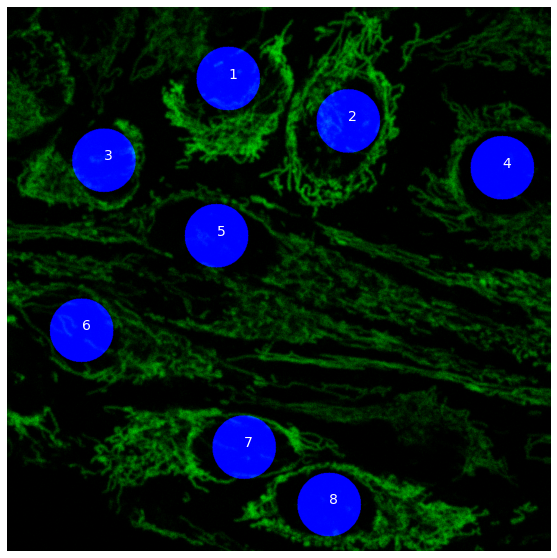

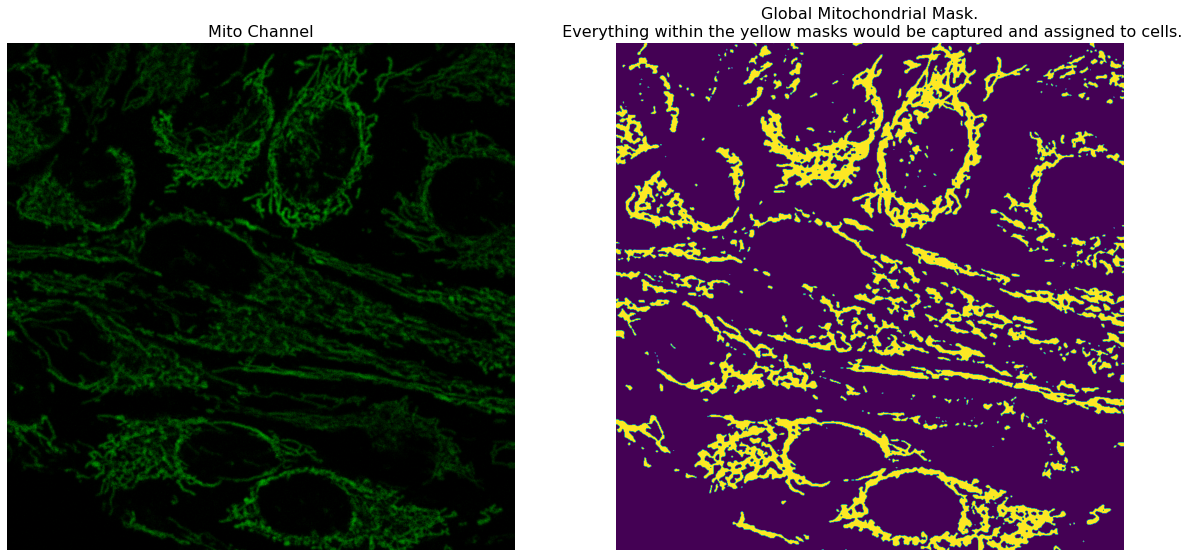

2020_10_21_HeLa_TMRE_fov_0001
2020_10_21_HeLa_TMRE_fov_0002-image_transformed.tif


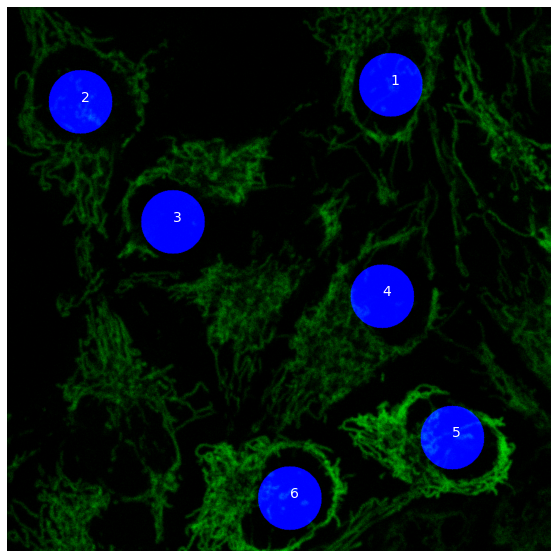

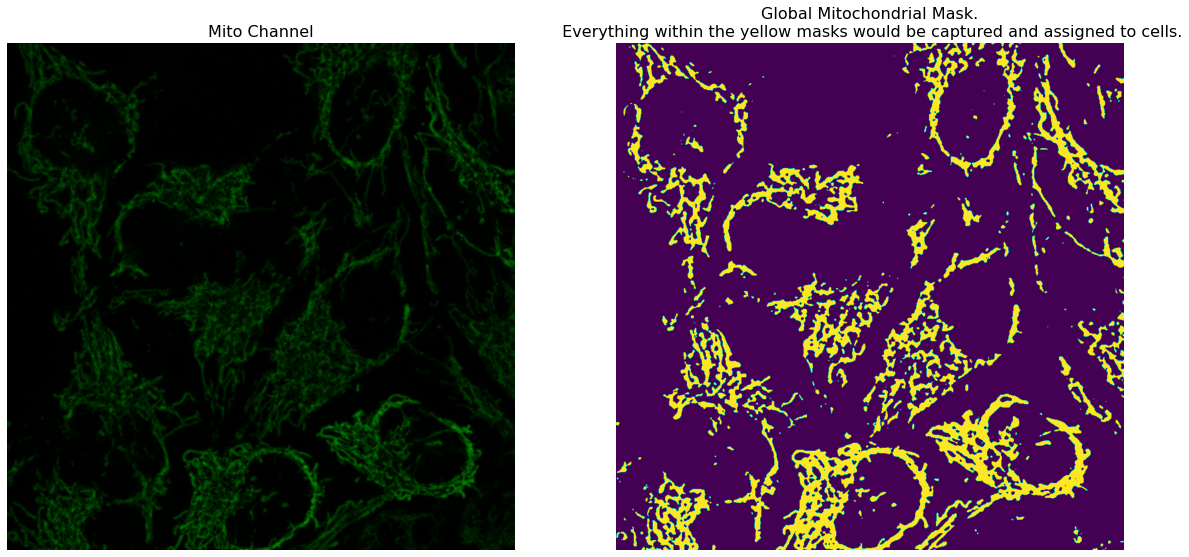

2020_10_21_HeLa_TMRE_fov_0002
2020_10_21_HeLa_TMRE_fov_0003-image_transformed.tif


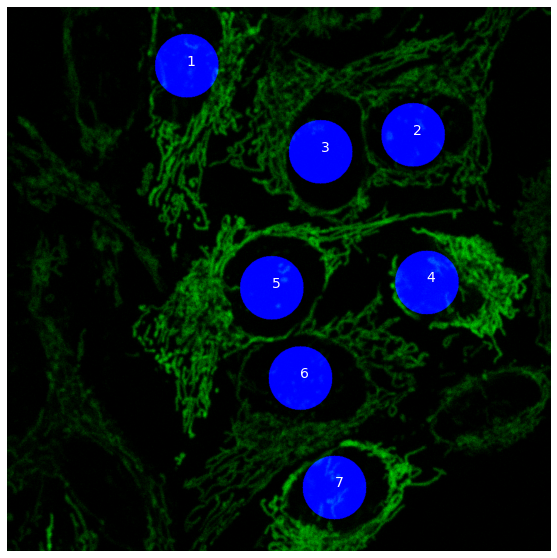

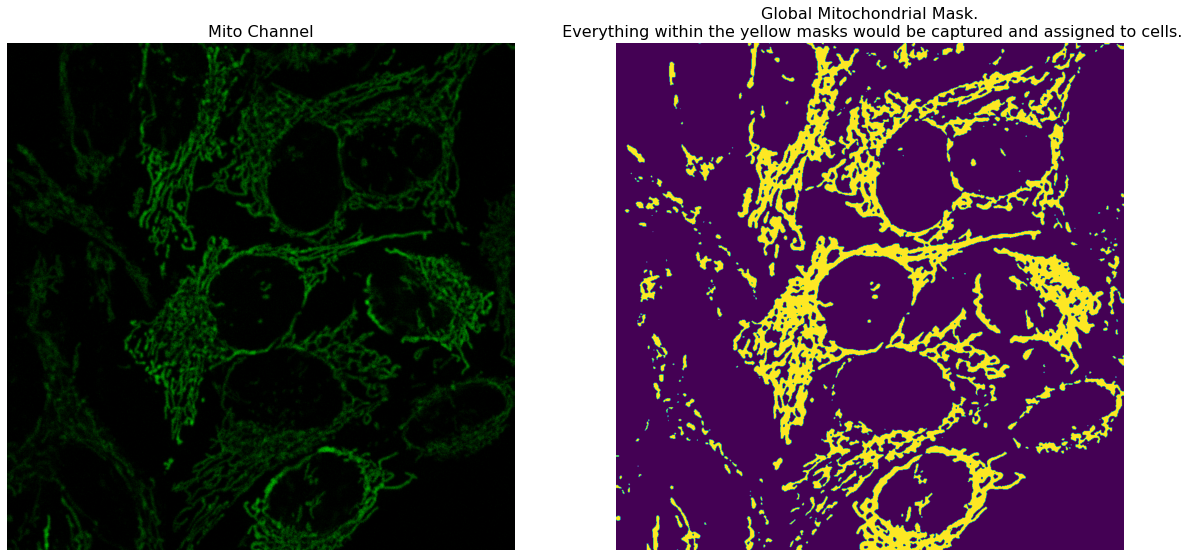

2020_10_21_HeLa_TMRE_fov_0003
2020_10_21_HeLa_TMRE_fov_0004-image_transformed.tif


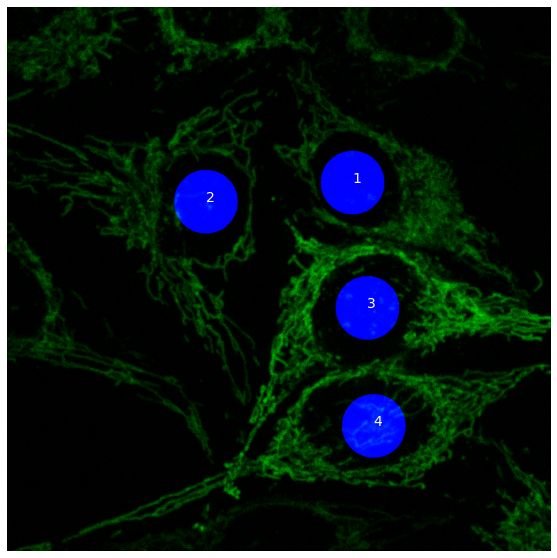

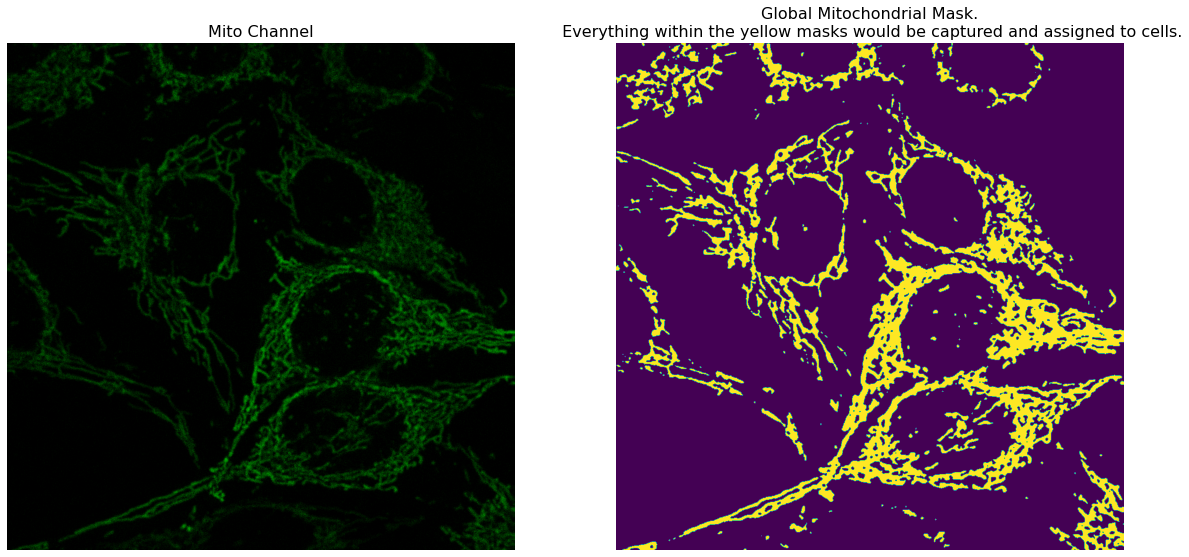

2020_10_21_HeLa_TMRE_fov_0004
2020_10_21_HeLa_TMRE_fov_0005-image_transformed.tif


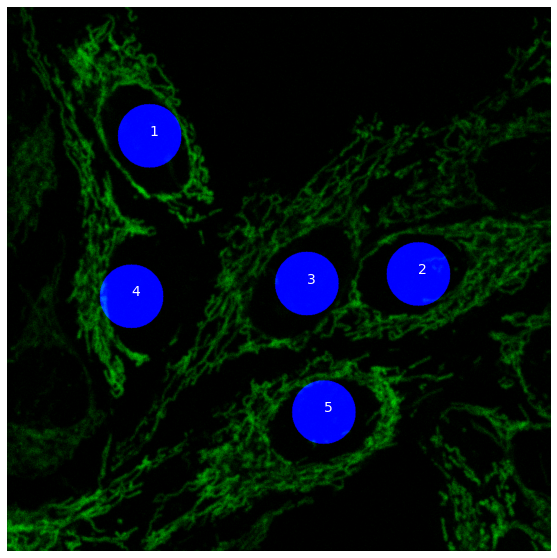

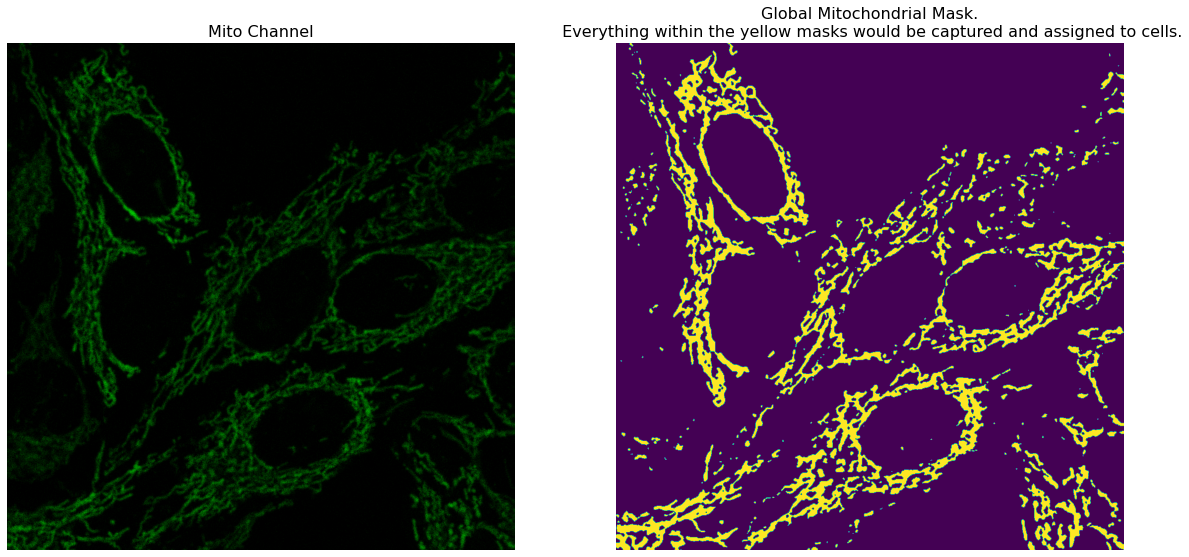

2020_10_21_HeLa_TMRE_fov_0005
2020_10_21_HeLa_TMRE_fov_0010-image_transformed.tif


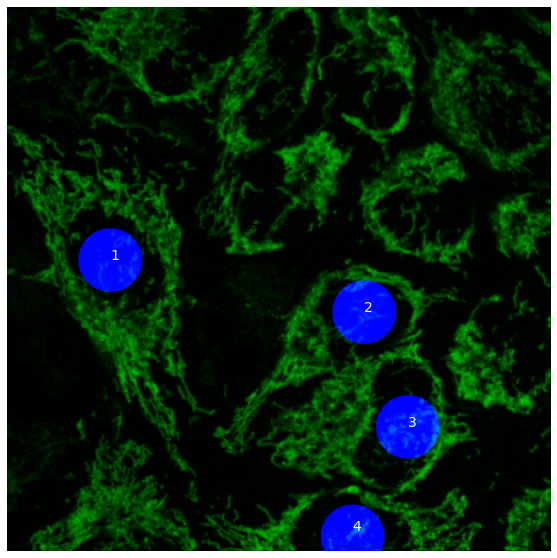

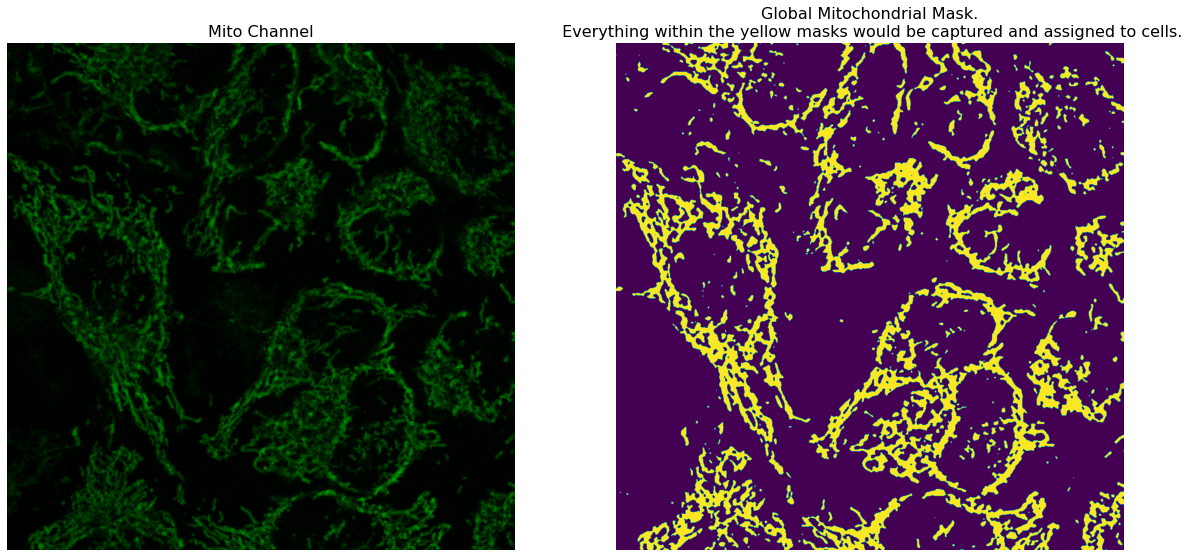

2020_10_21_HeLa_TMRE_fov_0010
2020_10_21_HeLa_TMRE_fov_0013-image_transformed.tif


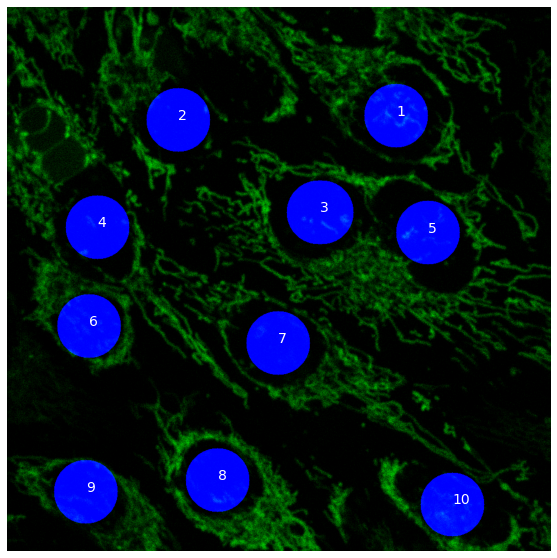

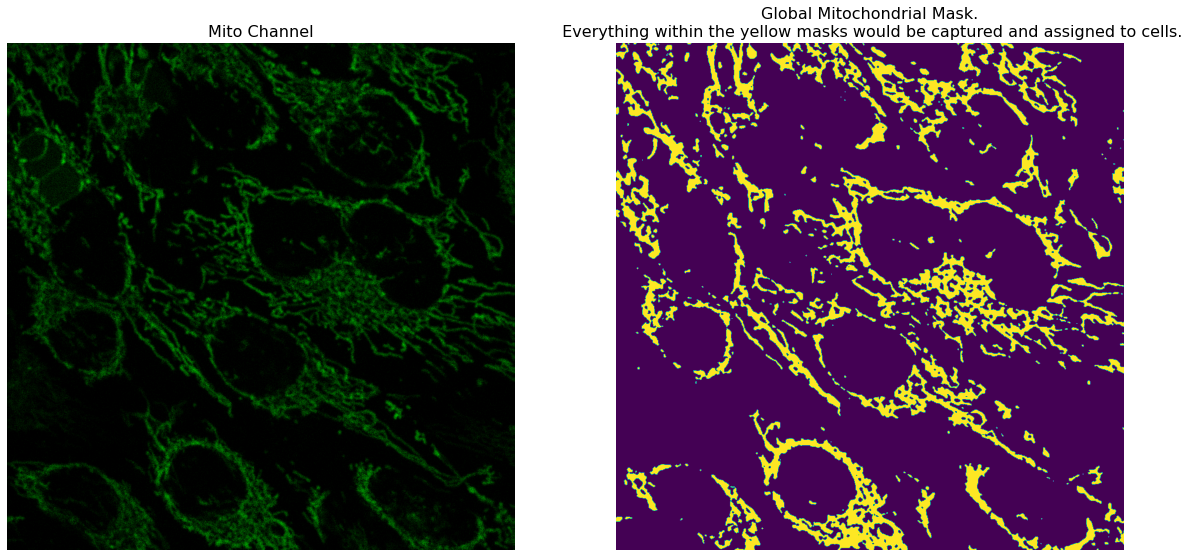

2020_10_21_HeLa_TMRE_fov_0013
2020_10_21_HeLa_TMRE_fov_0016-image_transformed.tif


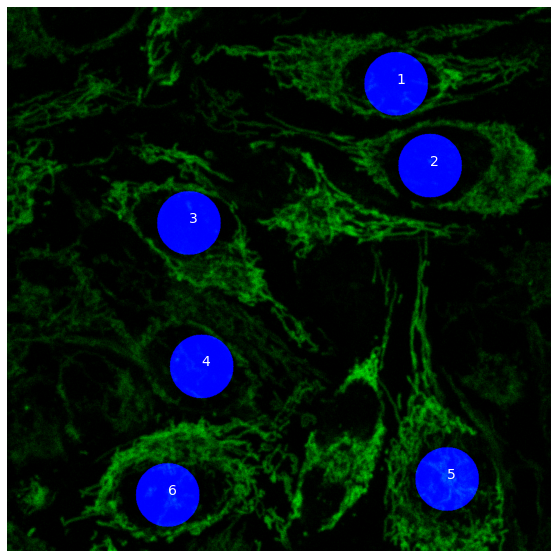

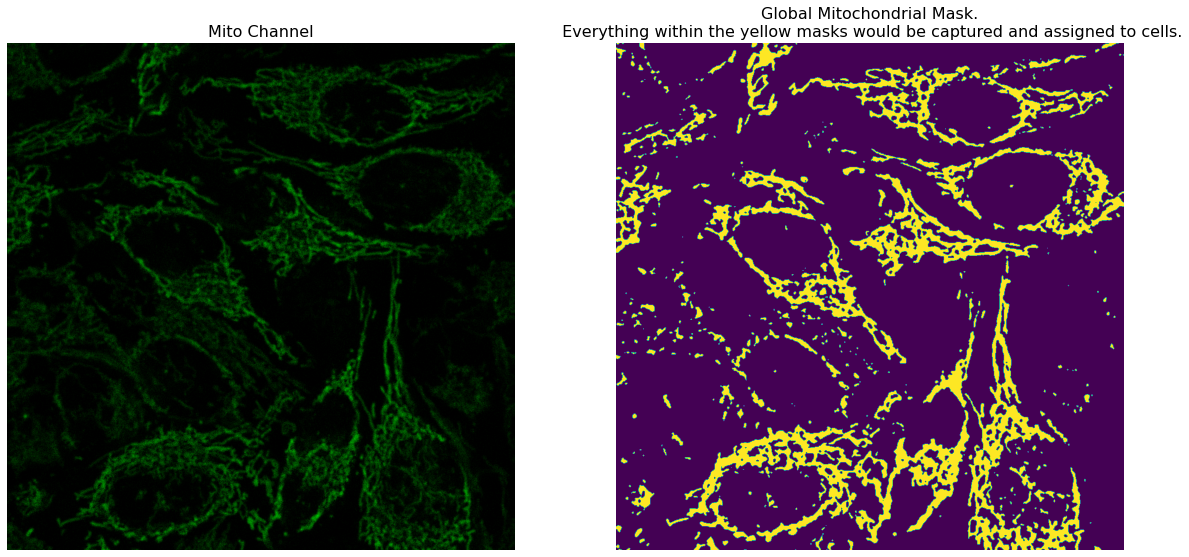

2020_10_21_HeLa_TMRE_fov_0016
2020_10_21_HeLa_TMRE_fov_0018-image_transformed.tif


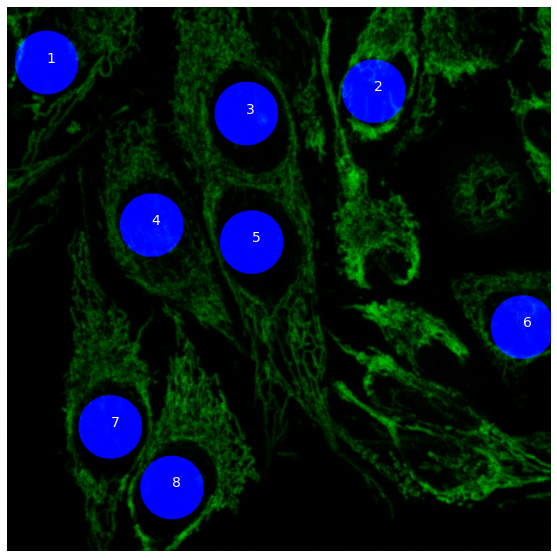

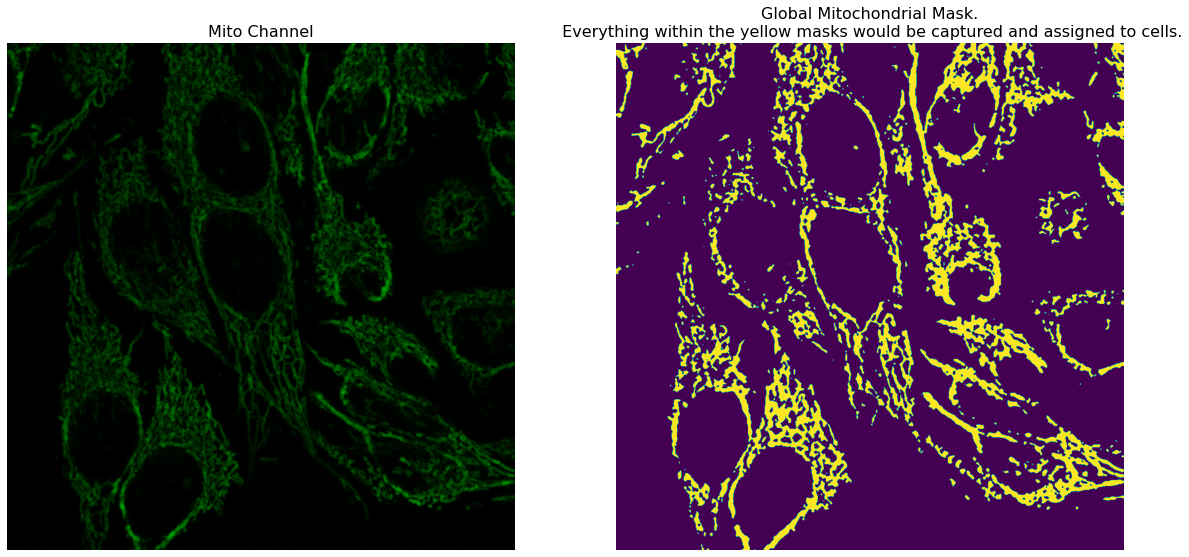

2020_10_21_HeLa_TMRE_fov_0018
2020_10_21_HeLa_TMRE_fov_0020-image_transformed.tif


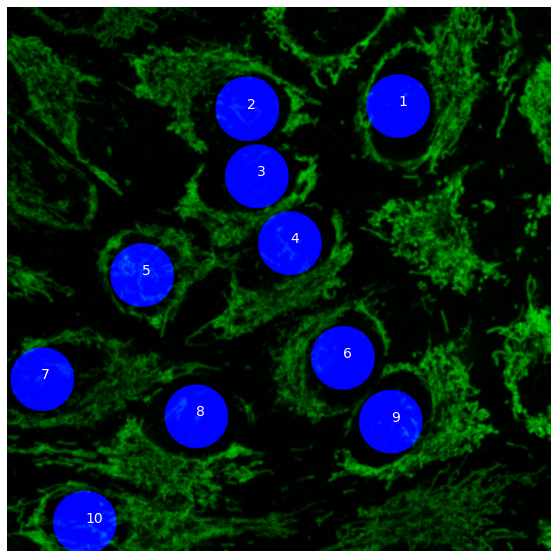

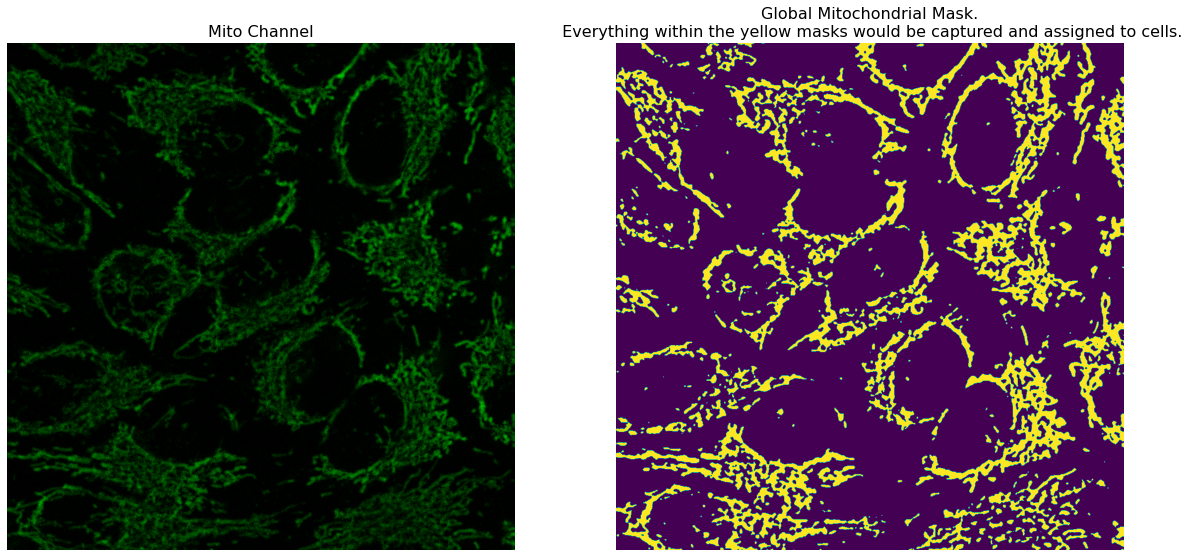

2020_10_21_HeLa_TMRE_fov_0020


In [19]:
#### ONLY RUN THIS CELL IF YOU'D LIKE TO EXPORT MITO MASK INTERMEDIATES

path_images = Path(address)
path_output = path_images / "masks_predicted"
path_output.mkdir(exist_ok=True)

params["only_export_mito_mask"].append(True)
for filename in file_list:

    fullpath_input = str(path_images / filename)
    abspath = str(path_images /  'cell_catcher_temp')
    namestring = filename[:filename.rfind('.')] + '.tif'
    print(namestring)
    
    try:
        mask_mito = cemia.auto_segmentation(fullpath_input, abspath, namestring,params['mito_threshold'][-1],params["separate"], params["dilation"], params['correct_cells'][-1], params['Intensity_threshold'][-1], params['Size_threshold'][-1],params['empty_cell_thresh'][-1], hide=False,nuc_correct=False,diffused=params['diffused_bg'][-1], mito_diffused=params['mito_low'][-1],entangled=params['sparse'][-1], non_uniformity=params['non_uniformity'][-1], only_export_mito_mask = params["only_export_mito_mask"][-1])
        
        # export mask
        filename = Path(fullpath_input).stem.rsplit("-",1)[0]
        print(filename)
        tifffile.imwrite(path_output / f"{filename}-mitohacker.tiff", mask_mito)

    except Exception as e:
        print(e)
        print(f'{filename} is not a valid image file, try another file.')
        pass


## 4) Processing all the cells
##### Just run next block of code, and then go and enjoy your time. Running this block of code may take few hours depending on the number of images that you have.

In [ ]:
try:
    os.makedirs(os.path.join(address, 'output'))
except FileExistsError:
    pass

cell_list = os.listdir(address)

# if you run this cell you don't want to just export mito
# masks, change flat to True
params["only_export_mito_mask"].append(False)

for file in file_list:

    fullpath_input = os.path.join(address, file)
    abspath = os.path.join(address, 'output')
    namestring = file[:file.rfind('.')] + '.tif'
    print(file)

    try:
        cemia.auto_segmentation(fullpath_input, abspath, namestring,params['mito_threshold'][-1],True,params['neighorhood'][-1], params['correct_cells'][-1], params['Intensity_threshold'][-1], params['Size_threshold'][-1], params['empty_cell_thresh'][-1], hide=True, nuc_correct=False, diffused=params['diffused_bg'][-1],mito_diffused=params['mito_low'][-1],entangled=params['sparse'][-1], non_uniformity=params['non_uniformity'][-1],params["only_export_mito_mask"][-1])
        cemia.single_cell_QC(abspath, hide=True)
    except:
        print('{} is not a valid image file, trying the next file.\n'.format(file))
        pass


print('You are all set!\n')

## Optional Step: Remove Cell Catcher Temp folders
#### If you want to delete the temporary folders created by Cell Catcher, please run the following cell. This is the folder that contains the cells that you isolated when you were experimenting with Cell Catcher.

In [ ]:
try:
    shutil.rmtree(os.path.join(address,'cell_catcher_temp'))
except:
    pass

# The End!